In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("train_indessa.csv")
print(df_train.shape)
df_train.head(1)

(532428, 45)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0


In [3]:
df_test = pd.read_csv("test_indessa.csv")
print(df_test.shape)
df_test.head()

(354951, 44)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


In [4]:
df = pd.concat([df_train, df_test])

In [5]:
df.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                 130748
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
pymnt_plan                          0
desc                           761599
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         454312
mths_since_last_record         750326
open_acc                           29
pub_rec     

In [6]:
df.tot_coll_amt.fillna(0, inplace = True)
df.tot_cur_bal.fillna(df.tot_cur_bal.median(), inplace = True)
df.total_rev_hi_lim.fillna(df.total_rev_hi_lim.median(), inplace = True)
df.acc_now_delinq.fillna(0, inplace = True)
df.collections_12_mths_ex_med.fillna(0, inplace = True)
df.total_acc.fillna(df.total_acc.median(), inplace = True)
df.revol_util.fillna(df.revol_util.median(), inplace = True)
df.pub_rec.fillna(0, inplace = True)
df.open_acc.fillna(df.open_acc.median(), inplace = True)
df.inq_last_6mths.fillna(0, inplace = True)
df.delinq_2yrs.fillna(0, inplace = True)
df.annual_inc.fillna(df.annual_inc.median, inplace = True)
df.emp_length.fillna('10+ years', inplace = True)

In [7]:
df['annual_inc'] = pd.to_numeric(df['annual_inc'], errors='coerce')

In [8]:
df.annual_inc.fillna(60000, inplace = True)

In [9]:
df.annual_inc.value_counts()

60000.0     34285
50000.0     30575
65000.0     25498
70000.0     24121
40000.0     23943
            ...  
44289.0         1
138375.0        1
54418.0         1
13886.0         1
58768.0         1
Name: annual_inc, Length: 49384, dtype: int64

In [10]:
df = df.drop(["member_id", "desc","emp_title" ,"batch_enrolled",  "mths_since_last_delinq", "mths_since_last_record", "mths_since_last_major_derog", "verification_status_joint"], axis = 1)

In [11]:
df.loan_status.fillna(123124324, inplace = True)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df[df.select_dtypes(include = object).columns] = df[df.select_dtypes(include = object).columns].apply(le.fit_transform)

In [14]:
df.select_dtypes(include = object).columns

Index([], dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 0 to 354950
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   887379 non-null  int64  
 1   funded_amnt                 887379 non-null  int64  
 2   funded_amnt_inv             887379 non-null  float64
 3   term                        887379 non-null  int32  
 4   int_rate                    887379 non-null  float64
 5   grade                       887379 non-null  int32  
 6   sub_grade                   887379 non-null  int32  
 7   emp_length                  887379 non-null  int32  
 8   home_ownership              887379 non-null  int32  
 9   annual_inc                  887379 non-null  float64
 10  verification_status         887379 non-null  int32  
 11  pymnt_plan                  887379 non-null  int32  
 12  purpose                     887379 non-null  int32  
 13  title         

In [16]:
df_train = df[0:532427]

In [17]:
df_test = df[532428::]

In [18]:
df_test.loan_status.value_counts()

123124324.0    354951
Name: loan_status, dtype: int64

In [19]:
df_test = df_test.drop("loan_status", axis = 1)

In [20]:
lf = df_train

In [21]:
# now we will do the samoling and model building part on this lf dataset

In [22]:
from sklearn.model_selection import train_test_split
lf_train_x, lf_test_x, lf_train_y, lf_test_y = train_test_split(lf.iloc[:,0:-1], lf.iloc[:,-1], test_size = .2)

In [23]:
print(lf_train_x.shape)
print(lf_test_x.shape)
print(lf_test_y.shape)
print(lf_train_y.shape)

(425941, 36)
(106486, 36)
(106486,)
(425941,)


In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight="balanced")

In [25]:
logreg.fit(lf_train_x, lf_train_y)

C:\Users\adity\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [26]:
pred_logreg = logreg.predict(lf_test_x)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [28]:
confusion_matrix(lf_test_y, pred_logreg)

array([[47012, 34428],
       [ 8973, 16073]], dtype=int64)

In [29]:
accuracy_score(lf_test_y, pred_logreg)

0.5924252953439889

In [30]:
precision_score(lf_test_y, pred_logreg)

0.31827092532821133

In [31]:
recall_score(lf_test_y, pred_logreg)

0.641739199872235

In [32]:
prob_logreg = logreg.predict_proba(lf_test_x)

In [33]:
tpr, fpr, threshold = roc_curve(lf_test_y, prob_logreg[:,1])

In [34]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'tpr')

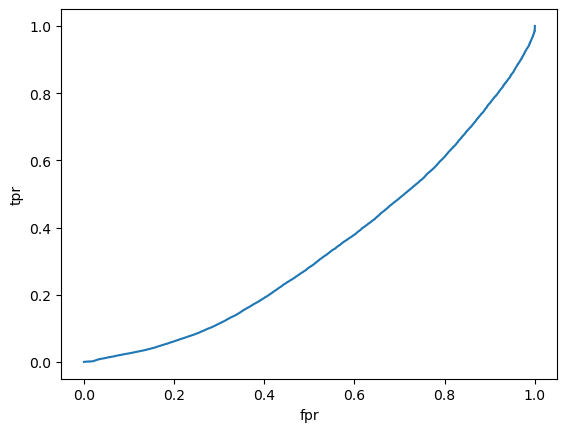

In [35]:
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")

In [36]:
roc_score_logreg = roc_auc_score(lf_test_y, pred_logreg)

In [37]:
roc_score_logreg

0.6094992659479054

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight="balanced", criterion='entropy',
                       max_depth=17, min_samples_split=80)

In [26]:
dt.fit(lf_train_x, lf_train_y)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=17, min_samples_split=80)

In [40]:
# dict = {"criterion":["gini", "entropy"],
#         "max_depth":range(10,20), 
#         "min_samples_split" : range(20,100, 20)}

In [41]:
# dt_best = GridSearchCV(dt, param_grid=dict)

In [42]:
# dt_best.fit(lf_train_x, lf_train_y)

In [43]:
# dt_best.best_estimator_

In [44]:
pred_dt = dt.predict(lf_test_x)

In [45]:
confusion_matrix(lf_test_y, pred_dt)

array([[69754, 11686],
       [ 7073, 17973]], dtype=int64)

In [46]:
accuracy_score(lf_test_y, pred_dt)

0.8238359972202919

In [47]:
precision_score(lf_test_y, pred_dt)

0.6059880643312316

In [48]:
recall_score(lf_test_y, pred_dt)

0.7175996167052623

In [49]:
roc_auc_score(lf_test_y, pred_dt)

0.7870537376257156

In [27]:
from sklearn.ensemble import AdaBoostClassifier
abc_dt = AdaBoostClassifier(dt, n_estimators=5)

In [51]:
abc_dt.fit(lf_train_x, lf_train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    criterion='entropy',
                                                    max_depth=17,
                                                    min_samples_split=80),
                   n_estimators=5)

In [52]:
pred_abc = abc_dt.predict(lf_test_x)

In [53]:
confusion_matrix(lf_test_y, pred_abc)

array([[72618,  8822],
       [ 6218, 18828]], dtype=int64)

In [54]:
accuracy_score(lf_test_y, pred_abc)

0.8587607760644592

In [55]:
recall_score(lf_test_y, pred_abc)

0.7517368042801246

In [56]:
roc_auc_score(lf_test_y, pred_abc)

0.8217058284661919

In [59]:
# now let's train the dataset on whole data to get solutions

In [60]:
df_new = df_train.iloc[:, 0:-1]
df_y = df_train.iloc[:, -1]

In [61]:
abc_dt.fit(df_new, df_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    criterion='entropy',
                                                    max_depth=17,
                                                    min_samples_split=80),
                   n_estimators=5)

In [62]:
pred_result = abc_dt.predict(df_test)

In [63]:
pred_result

array([0., 0., 0., ..., 0., 0., 1.])

In [64]:
df_test.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [65]:
test = pd.read_csv("test_indessa.csv")

In [66]:
test.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [67]:
solution = pd.DataFrame()

In [68]:
solution["member_id"] = test.member_id
solution["loan_status"] = pred_result

### solution

In [70]:
solution.to_csv("solution.csv", index = False)

In [29]:
data = df_train.iloc[:, 0:-1]

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA

In [31]:
scaler = StandardScaler()

In [32]:
scaller_x = scaler.fit_transform(data)

In [33]:
pca = PCA()

In [34]:
x_pca = pca.fit_transform(scaller_x)

In [35]:
x_pca.shape

(532427, 36)

In [36]:
pca.explained_variance_ratio_[0:32].sum()

0.9984073751953764

In [37]:
df1 = pd.DataFrame(x_pca)

In [38]:
data_train_x, data_test_x, data_train_y, data_test_y = train_test_split(df1, df_train.iloc[:, -1], test_size=.2)

In [39]:
abc_dt.fit(data_train_x, data_train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    criterion='entropy',
                                                    max_depth=17,
                                                    min_samples_split=80),
                   n_estimators=5)

In [40]:
pred_pca = abc_dt.predict(data_test_x)

In [41]:
confusion_matrix(data_test_y, pred_pca)

array([[66151, 15226],
       [ 9217, 15892]], dtype=int64)

In [42]:
abc_dt.predict_proba(data_test_x)

array([[0.45865979, 0.54134021],
       [0.61369904, 0.38630096],
       [0.57305409, 0.42694591],
       ...,
       [0.71282949, 0.28717051],
       [0.55488911, 0.44511089],
       [0.40335437, 0.59664563]])

In [43]:
array([[72061,  9259],
       [ 6311, 18855]
array([[72061,  9259],
       [ 6311, 18855]

SyntaxError: invalid syntax (2248883958.py, line 3)